In [2]:
# Reference : https://stackoverflow.com/questions/56995350/best-practices-python-where-to-store-api-keys-tokens
import tweepy
import constants
import csv


# Initialise API authentication for Twitter Developer access
twit_api_key = constants.api_key
twit_api_secret = constants.api_secret
access_token = constants.access_token
access_token_secret = constants.access_secret

auth = tweepy.OAuthHandler(twit_api_key, twit_api_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
from bs4 import BeautifulSoup
import requests

# Initialise list to contain Malaysia cities
city = []

# Add city into the list from the following website
page = requests.get("https://worldpopulationreview.com/countries/cities/malaysia")
soup = BeautifulSoup(page.content,'html.parser')
for idx, link in enumerate(soup.find_all('td')):
        if idx % 2 == 0:
            city.append(link.string)



In [ ]:
# Reference 1: https://dev.to/twitterdev/a-comprehensive-guide-for-using-the-twitter-api-v2-using-tweepy-in-python-15d9 
# Reference 2: https://developer.twitter.com/en/docs/twitter-api/tweets/search/api-reference/get-tweets-search-recent
from datetime import datetime, timedelta

# Initialise permission to allow requests to scrape
client = tweepy.Client(bearer_token = constants.bearer_token)

# Initialise query to get recent tweets from users, excluding retweets
query = '#daruratbanjir OR #banjir2021 -is:retweet'

# Intialise time period of raw data wish to be extracted
# 10 seconds due to Twitter API limitation - must be a minimum of 10 seconds prior to the request time.
now = datetime.utcnow() - timedelta(seconds = 10)
start_time = (now - timedelta(days = 1)).strftime('%Y-%m-%dT%H:%M:%SZ')
end_time = now.strftime('%Y-%m-%dT%H:%M:%SZ')

# Initalise an array to get tweets context which is returned as an array object
d = []

# Open CSV file in write mode
with open('tweets.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f, delimiter = ',')
    
    # Initialise header
    writer.writerow(['tweet_text', 'created_at','place','context_annotations'])
    
    # Use Paginator to get more than the max limits set by the search_recent_tweets function
    for tweet in tweepy.Paginator(client.search_recent_tweets, query=query,
                                  tweet_fields=['context_annotations', 'created_at', 'geo'], 
                                  start_time=start_time, end_time=end_time,max_results=100).flatten(limit=10000):
    # Intialise variables and write into CSV file    
        a = tweet.text
        b = tweet.created_at
        c = tweet.geo
        if len(tweet.context_annotations)>0:
            d = tweet.context_annotations
        e = [ele for ele in city if(ele in a)]
        writer.writerow([a,b,c,d,e])

In [39]:
import pandas as pd

# Load CSV into dataframe
df = pd.read_csv ('tweets.csv')

In [40]:
df.head()

,tweet_text,created_at,place,context_annotations
0,kemana kamu nak alirkan air dari kota kemuning...,2022-01-01 14:33:48+00:00,NaN,"[{'domain': {'id': '66', 'name': 'Interests an..."
1,#DaruratBanjir\r\n#Johor https://t.co/Nxy7oMWwkr,2022-01-01 14:33:26+00:00,NaN,"[{'domain': {'id': '66', 'name': 'Interests an..."
2,"menteri fed &amp; state &amp; exco ,\r\nsement...",2022-01-01 14:31:39+00:00,NaN,"[{'domain': {'id': '66', 'name': 'Interests an..."
3,#DaruratBanjir #BenderaPutih #RakyatJagaRakyat...,2022-01-01 14:22:17+00:00,NaN,"[{'domain': {'id': '66', 'name': 'Interests an..."
4,Bantuan RM2500 untuk membeli barang2 keperluan...,2022-01-01 14:18:25+00:00,NaN,"[{'domain': {'id': '66', 'name': 'Interests an..."


In [41]:
# Split timestamp into date and timestamp
timestamp = df["created_at"].str.split(" ", n = 1, expand = True)
df["date"] = pd.to_datetime(timestamp[0])
df["time"] = timestamp[1]

In [42]:
# Group the tweets by date into new dataframe
df_count = df.groupby(df.date.dt.floor('1D')).count()
df_count

,tweet_text,created_at,place,context_annotations,date,time
date,,,,,,
2021-12-25,308,308,21,308,308,308
2021-12-26,1264,1264,83,1264,1264,1264
2021-12-27,997,997,57,997,997,997
2021-12-28,631,631,13,631,631,631
2021-12-29,419,419,21,419,419,419
2021-12-30,322,322,14,322,322,322
2021-12-31,238,238,9,238,238,238
2022-01-01,187,187,6,187,187,187


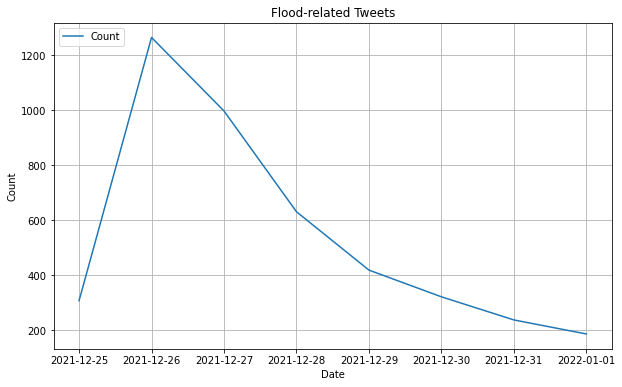

In [36]:
# Convention for import of the pyplot interface
import matplotlib.pyplot as plt

# Set-up to have matplotlib use its support for notebook inline plots
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(df_count.tweet_text, color='tab:blue', label='Count')

# Same as above
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.set_title('Flood-related Tweets')
ax.grid(True)
ax.legend(loc='upper left');